# Object-Oriented Playing Cards

06/14/22

## Topics

- **Defining/Initializing Classes**
- **Inspecting classes:**
    - `help(obj)` vs `dir(obj)`
    
- **Deeper dive into Classes/Objects**
    - special methods/properties (`__repr__(),__str__(),__call__(),__version__(),__name__()`)
    - Methods: vs Bound Methods vs Static Methods 
    
- **Extended Activity: Building a Deck of PlayingCards**

# What does it mean to be 'Object-Oriented'?

> ### ___"Everything is an object."___
- some Python sensei


- Any function, method, class, variable are ALL objects. 
    - Built from a template Class
    - Can be stored in memory under any name 

In [8]:
print

<function print>

In [9]:
## Any function can be assigned to a new variable and will behave the same way
prove_it = print
prove_it

<function print>

In [10]:
# test our "prove_it" functon
prove_it("This is now equal to print.")

This is now equal to print.


In [11]:
# run help on prove_it
help(prove_it)


Help on built-in function print in module builtins:

print(...)
    print(value, ..., sep=' ', end='\n', file=sys.stdout, flush=False)
    
    Prints the values to a stream, or to sys.stdout by default.
    Optional keyword arguments:
    file:  a file-like object (stream); defaults to the current sys.stdout.
    sep:   string inserted between values, default a space.
    end:   string appended after the last value, default a newline.
    flush: whether to forcibly flush the stream.



In [12]:
## what is the __name__ of our function?
prove_it.__name__

'print'

In [13]:
help(4)

Help on int object:

class int(object)
 |  int([x]) -> integer
 |  int(x, base=10) -> integer
 |  
 |  Convert a number or string to an integer, or return 0 if no arguments
 |  are given.  If x is a number, return x.__int__().  For floating point
 |  numbers, this truncates towards zero.
 |  
 |  If x is not a number or if base is given, then x must be a string,
 |  bytes, or bytearray instance representing an integer literal in the
 |  given base.  The literal can be preceded by '+' or '-' and be surrounded
 |  by whitespace.  The base defaults to 10.  Valid bases are 0 and 2-36.
 |  Base 0 means to interpret the base from the string as an integer literal.
 |  >>> int('0b100', base=0)
 |  4
 |  
 |  Built-in subclasses:
 |      bool
 |  
 |  Methods defined here:
 |  
 |  __abs__(self, /)
 |      abs(self)
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __and__(self, value, /)
 |      Return self&value.
 |  
 |  __bool__(self, /)
 |      self != 0
 |  
 |  __ceil_

# Reviewing Functions

#### VOCAB RELATED TO FUNCTIONS:

- **Function: A resuable, fleixbile block of code that runs a process**  

    - Parameters: inputs that are expected by python/that function
    
    - Argument: the actual value/variable passed into the function. 
        - Positional Argument:
        - Keyword/default Arguments:

- "Calling" a function: `( )`

In [14]:
# del prove_it

In [15]:
def my_func(posarg1, 
            posarg2, kwarg1='example',kwarg2='example2'):
    print('positional arguments:')
    print(f"    {posarg1}, {posarg2}")
    
    print("keyword arguments:")
    print(f"    kwarg1={kwarg1}")
    print(f"    kwarg2={kwarg2}")

In [16]:
## What does my_func look like?
my_func

<function __main__.my_func(posarg1, posarg2, kwarg1='example', kwarg2='example2')>

In [19]:
## Run my_func with posarg1=1,posarg2=2
my_func(1,2)

positional arguments:
    1, 2
keyword arguments:
    kwarg1=example
    kwarg2=example2


In [20]:
## Change kwarg1 to something else
my_func(1,2,kwarg1='something else')

positional arguments:
    1, 2
keyword arguments:
    kwarg1=something else
    kwarg2=example2


# Defining and Initializing Classes


- Use `class NewClassName():` like you use `def function_name():` for functions.
    - the `()` are optional for classes. (used to inherit other classes, more on that later)

#### Naming Classes
    
- Convention for naming classes = `UpperCamelCase`
- Convention for naming function = `snake_case`

In [21]:
## Bare minimum to define a class.
class PlayingCard:
    pass

In [22]:
PlayingCard

__main__.PlayingCard

## Attributes and Methods

- Attribute: a variable is stored inside a class/object

- Method: a function that is stored inside of and (usually) operates on the object/class

## What makes a PlayingCard?

***Card:***
- *Value / Name*:
    - 2, 3, 4, 5, 6, 7, 8, 9, 10, J, Q, K, A
- *Suit*:
    - Hearts (H), Spades(S), Clubs(C), Diamonds(D) 
- *Color*:
    - black or red

In [28]:
## Make a new PlayingCard class with a value of 2 and a suit of spades, and color=black
class PlayingCard:
    value = 2
    suit = "S"
    color="black"

PlayingCard

__main__.PlayingCard

In [25]:
## Make an instance of a PlayingCard and display it
card1 = PlayingCard()
card1

In [32]:
# id(card1)

In [29]:
## Print out the vard's value and suit in one statement
print(f"{card1.value} of {card1.suit}")

2 of S


> Improving our class: let's add a `.flip()` method that will print the value and suit. 


In [33]:
## Copy previous version of class and add the .flip method.
class PlayingCard:
    value = 2
    suit = "S"
    color="black"
    
    def flip():
        print(f"{value} of {suit}")

In [34]:
## Insantiate a playing card and run .flip()    
card = PlayingCard()
card.flip()

TypeError: flip() takes 0 positional arguments but 1 was given

> Ruh roh! What happened?! What does the error message mean?

### Know thy `self`

- Because Methods are designed to operate on the `object_its.attached_to()`, Python automatically gives every method a copy of instance its attached to, which we call `self`
- We have to pass `self` as the first parameter for every method we make.
- Otherwise it will think that the first thing we give it is actually itself. This will cause an *existential crisis** and corresponding error.

In [37]:
## Update our class by adding self where its needed.

class PlayingCard:
    value = 2
    suit = "S"
    color="black"
    
    def flip(self):
        print(f"{self.value} of {self.suit}")

In [38]:
## Insantiate a playing card and run .flip()    
card = PlayingCard()
card.flip()

2 of S


## Initialization 


- As we have seen, we create an instance by setting a `instance = ClassName()`
-  This uses the template `ClassName` to create an instance of the class ( which we named `instance`).
> - How do we change our PlayingCard class so that we can make other cards besides the 2 of spades?

### `__init__`

> - When an instance is `initialized`, we `call` it using `()`, which runs a default `__init__()` method.

In [49]:
## Update our class by adding an __init__ that controls value, suit, color

        
class PlayingCard:

    
    def __init__(self,value,suit):
        self.value = value
        self.suit = suit
        self.color = 'black' if suit in ('S', 'C') else 'red'

    
    def flip(self):
        print(f"{self.value} of {self.suit}")

In [50]:
## test out our updated playing card class by making  card1 = a 'J of Hearts'
card1 = PlayingCard("J",'H')
card1.flip()

J of H


In [51]:
card1.value

'J'

In [52]:
## test out our updated playing card class by making a 7 of Spades
card2 = PlayingCard(7,'S')
card2.flip()

7 of S


### is card 1 greater than card 2?

In [53]:
card1 > card2

TypeError: '>' not supported between instances of 'PlayingCard' and 'PlayingCard'

# Special Class Methods

#### Special Methods

It is common for a class to have magic methods. These are identifiable by the "dunder" (i.e. **d**ouble **under**score) prefixes and suffixes, such as `__init__()`. These methods will get called **automatically**, as we'll see below.

For more on these "magic methods", see [here](https://www.geeksforgeeks.org/dunder-magic-methods-python/).

## Using Special Methods to evaluate comparisons 

### `__gt__` & `__lt__`:


In [57]:
## Add a __gt__ and __lt__ method to compare self to other
        
class PlayingCard:

    
    def __init__(self,value,suit):
        """Creates a playing card instance with the specified value and suit
        Value should be 2-10, or J,Q,K,A
        Suit should be 'H','D','C','S'
        """
        self.value = value
        self.suit = suit
        self.color = 'black' if suit in ('S', 'C') else 'red'

    
    def flip(self):
        print(f"{self.value} of {self.suit}")
        
    def __gt__(self, other):
        return self.value > other.value
    
    def __lt__(self, other):
        return self.value < other.value


In [55]:
## test out our updated playing card class by making  card1 = a 'J of Hearts'
card1 = PlayingCard("J",'H')
card1.flip()

## test out our updated playing card class by making a 7 of Spades
card2 = PlayingCard(7,'S')
card2.flip()

card1>card2

J of H
7 of S


TypeError: '>' not supported between instances of 'str' and 'int'

> - Ruh Roh! We can't compare a str and an int! Let's fix this with out `__init__ `



#### Adding our card's value

- Create a string-based `name` for the card
    - Update `.flip()` to use `name` instead of `value`
- Save the numeric `value` of the card for comparison
- 

In [ ]:
## Value dictionary for lookup 
value_dct = {
    '2': 2,'3': 3, '4': 4, '5': 5, '6': 6,
    '7': 7, '8': 8, '9': 9, '10': 10,
    'J': 11,'Q': 12, 'K': 13, 'A': 14
    }
value_dct

In [60]:
## Create a string-based name for the card
# save the numeric value of the card for comparison
class PlayingCard:

    
    def __init__(self,value,suit):
        """Creates a playing card instance with the specified value and suit
        Value should be 2-10, or J,Q,K,A
        Suit should be 'H','D','C','S'
        """
        self.value = value

        value = str(value)
        value_dct = {
            '2': 2,'3': 3, '4': 4, '5': 5, '6': 6,
            '7': 7, '8': 8, '9': 9, '10': 10,
            'J': 11,'Q': 12, 'K': 13, 'A': 14
            }
        
        self._value = value_dct[value]
        self.suit = suit
        self.color = 'black' if suit in ('S', 'C') else 'red'

    
    def flip(self):
        print(f"{self.value} of {self.suit}")
        
    def __gt__(self, other):
        return self._value > other._value
    
    def __lt__(self, other):
        return self._value < other._value

In [61]:
## Run this cell to test our value comparison from before
card1 = PlayingCard('J','H')
card1.flip()

card2 = PlayingCard(7,'S')
card2.flip()

card1>card2

J of H
7 of S


True

In [ ]:
## What about card1<card2?
card1<card2

In [62]:
card1.value

'J'

In [63]:
card1._value

11

> Success! This is great and all, but the PlayingCard isn't terribly fun-looking 

In [65]:
## Display card1
display(card1)
card1

## Using special methods to control the output of a class

In [ ]:
## Display card 1


### `__repr__()`  &  `__str__()`

- Whenever an object is displayed, it runs the object's  `__repr__()` method. 
- Whenever an object is printed, it runs the  `__str__()` method.

- They are both designed to return string-representations of the object. 
    - But `__repr__()` focuses on minimizing ambiguity while `__str__()` focuses on readability. 
- However, if your class has no `__str__()` method, it will fall back on `__repr__()` (if it exists!). 
    - For more on this distinction, see [this post](https://dbader.org/blog/python-repr-vs-str).

### Add a `__repr__` and ` __str__` method to our PlayingCard

- have `__repr__` return 'An Instance of a PlayingCard'
- have `__str__` return "A Playing Card"

In [66]:
### add a __repr__() method that returns "A Playing Card"
class PlayingCard:

    
    def __init__(self,value,suit):
        """Creates a playing card instance with the specified value and suit
        Value should be 2-10, or J,Q,K,A
        Suit should be 'H','D','C','S'
        """
        self.value = value

        value = str(value)
        value_dct = {
            '2': 2,'3': 3, '4': 4, '5': 5, '6': 6,
            '7': 7, '8': 8, '9': 9, '10': 10,
            'J': 11,'Q': 12, 'K': 13, 'A': 14
            }
        
        self._value = value_dct[value]
        self.suit = suit
        self.color = 'black' if suit in ('S', 'C') else 'red'

    
    def flip(self):
        print(f"{self.value} of {self.suit}")
        
    def __gt__(self, other):
        return self._value > other._value
    
    def __lt__(self, other):
        return self._value < other._value
    
    def __repr__(self):
        return "An Instance of a PlayingCard"
    
    def __str__(self):
        return "A Playing Card"

In [68]:
## Test out our __repr__ & __str__
## Run this cell to test our value comparison from before
card1 = PlayingCard('J','H')

card2 = PlayingCard(7,'S')
print(card1)
card1

A Playing Card


An Instance of a PlayingCard

### Making Things More Interesting

-  Instead of our text-based `__repr__` and `__str__`, let's be sneaky and use an image of card back for our `__repr__`.

<img src="card_back.png" width=100>

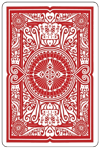

In [69]:
from PIL import Image
img = Image.open("card_back.png")
img.resize((100,150))

> - Add a `back` attribute that stores the image of the card. 
- Replace our `__repr__` with display the image
    - Go ahead and delete our `__str__` since we want it to behave the same as `__repr__` anyway

In [74]:
### add a .back containing the stored image of the card.
### add a __repr__() method that returns "A Playing Card"
class PlayingCard:

    
    def __init__(self,value,suit):
        """Creates a playing card instance with the specified value and suit
        Value should be 2-10, or J,Q,K,A
        Suit should be 'H','D','C','S'
        """
        self.value = value

        value = str(value)
        value_dct = {
            '2': 2,'3': 3, '4': 4, '5': 5, '6': 6,
            '7': 7, '8': 8, '9': 9, '10': 10,
            'J': 11,'Q': 12, 'K': 13, 'A': 14
            }
        
        self._value = value_dct[value]
        self.suit = suit
        self.color = 'black' if suit in ('S', 'C') else 'red'
        
        self.back = Image.open("card_back.png").resize((100,150))
        

    
    def flip(self):
        print(f"{self.value} of {self.suit}")
        
    def __gt__(self, other):
        return self._value > other._value
    
    def __lt__(self, other):
        return self._value < other._value
    
    def __repr__(self):
        display(self.back)
        return ""
    
    def __str__(self):
        return "A Playing Card"
    
    

A Playing Card


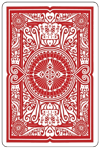

In [76]:
## Test out our __repr__
card1 = PlayingCard("J",'H')
print(card1)
card1#.back


In [77]:
# test our __str__
print(card1)

A Playing Card


In [78]:
#test our .flip()
card1.flip()

J of H


> Success!

### Making our class even MORE fun 

- Our `.flip()` method is kind of boring compared to our `__repr__`
- If only we had some way of using symbols in our text instead of just boring old font.... 🤔

In [79]:
## Our dictionary of suit symbols
symbols = {'S':'♠️','C':'♣️','D':'♦️','H':'♥️'}
symbols

{'S': '♠️', 'C': '♣️', 'D': '♦️', 'H': '♥️'}

> #### Use these emoji symbols plus the provided make_ascii_card to overhaul our class's .flip()

In [80]:
def make_ascii_card(name, suit):
    """Ascii Card adapted from: https://codereview.stackexchange.com/questions/82103/ascii-fication-of-playing-cards
    """
    symbols = {'S':'♠️','C':'♣️',
               'D':'♦️','H':'♥️'}
    suit_symbol = symbols[suit]
    if name == '10':
        space=''
    else:
        space = ' '

    # add the individual card on a line by line basis
    _ascii=[]
    _ascii.append('┌─────────┐')
    _ascii.append(f'│{name}{space}       │')#.format(rank, space))  # use two {} one for char, one for space or char
    _ascii.append('│         │')
    _ascii.append('│         │')
    _ascii.append(f'│    {suit_symbol}   │') #.format(suit))
    _ascii.append('│         │')
    _ascii.append('│         │')
    _ascii.append(f'│       {space}{name}│')#.format(space, rank))
    _ascii.append('└─────────┘')
    
    return '\n'.join(_ascii)



print(make_ascii_card('A','D'))

┌─────────┐
│A        │
│         │
│         │
│    ♦️   │
│         │
│         │
│        A│
└─────────┘


> - Add a .face containing the stored ascii version of the card.
- Change `.flip()` to use the new face.


In [83]:
### add a .face containing the stored ascii version of the card.
### add a .back containing the stored image of the card.
### add a __repr__() method that returns "A Playing Card"
class PlayingCard:

    
    def __init__(self,value,suit):
        """Creates a playing card instance with the specified value and suit
        Value should be 2-10, or J,Q,K,A
        Suit should be 'H','D','C','S'
        """
        self.value = value

        value = str(value)
        value_dct = {
            '2': 2,'3': 3, '4': 4, '5': 5, '6': 6,
            '7': 7, '8': 8, '9': 9, '10': 10,
            'J': 11,'Q': 12, 'K': 13, 'A': 14
            }
        
        self._value = value_dct[value]
        self.suit = suit
        self.color = 'black' if suit in ('S', 'C') else 'red'
        
        self.back = Image.open("card_back.png").resize((100,150))
        self.face = make_ascii_card(self.value, self.suit)

    
    def flip(self):
        # print(f"{self.value} of {self.suit}")
        print(self.face)
        
    def __gt__(self, other):
        return self._value > other._value
    
    def __lt__(self, other):
        return self._value < other._value
    
    def __repr__(self):
        display(self.back)
        return ""
    
    def __str__(self):
        return "A Playing Card"
    

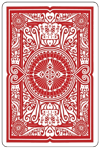

┌─────────┐
│J        │
│         │
│         │
│    ♥️   │
│         │
│         │
│        J│
└─────────┘


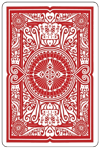

┌─────────┐
│7        │
│         │
│         │
│    ♠️   │
│         │
│         │
│        7│
└─────────┘


True

In [84]:
## Run this cell to test our value comparison from before
card1 = PlayingCard('J','H')
display(card1)
card1.flip()

card2 = PlayingCard(7,'S')
display(card2)
card2.flip()

card1>card2

> Yay!!! We are HUGE nerds but yay!!!!

# NEXT:  Make a `Deck` to Explore some additional special methods. 

### Overview - Whats in a Deck?

***A Deck***
- "a collection of Cards"
    - Contains all standard 52 cards in a `.cards` attribute.
- Has a  `.shuffle()` method.
- Returns the number of cards in the deck as the `__repr__`

- Has a `__getitem__` method to make the deck subscriptable

In [104]:
import numpy as np

class Deck:
    def __init__(self):
        self.cards = []
        
        cards_to_make = list(range(2,11))
        cards_to_make.extend(['J','Q','K','A'])
        suits_to_make = ['S','C','D','H']
        
        
        for suit in suits_to_make:
            for value in cards_to_make:
                self.cards.append(PlayingCard(value, suit))
                
    def __repr__(self):
        return f"There are {len(self.cards)} cards in the deck."

    def __getitem__(self, index):
        return self.cards[index]
    
    def shuffle(self):
        np.random.shuffle(self.cards)

In [105]:
## Test out the Deck class by running the next cells
deck = Deck()
deck

There are 52 cards in the deck.

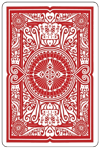

In [106]:
## Slice out the first .cards
deck[0]

In [107]:
## Slice first card directly and flip
deck[0].flip()

┌─────────┐
│2        │
│         │
│         │
│    ♠️   │
│         │
│         │
│        2│
└─────────┘


In [103]:
deck[1].flip()

┌─────────┐
│3        │
│         │
│         │
│    ♠️   │
│         │
│         │
│        3│
└─────────┘


In [108]:
## shuffle and flip the first card again
deck.shuffle()

In [109]:
## Completed Deck Class
deck[0].flip()

┌─────────┐
│8        │
│         │
│         │
│    ♠️   │
│         │
│         │
│        8│
└─────────┘


# Nice!

## To recap, we:

1. Built a Card object using `class`.
    - Used `__init__(self)` to set attributes and run processes when the object is created.
    - Created a method `flip(self)` which "flips the card over" (shows the name and suit).
    - Experimented with `__str__` and `__repr__`.

  
2. Built a Deck object that uses `Cards`!
    - Decks can `shuffle` and `shuffle_and_deal`.
    
---

There are some points which we missed for the sake of drawing up the example.

- We could clean up the Card functions for deciding what to do if a user tries to create a Card without a real `name` or `suit`.

- We also don't have a plan for what happens if the Deck uses `shuffle_and_deal` but doesn't have enough cards left!

___

# APPENDIX

## Inheritance


- We can inherit all of the properties of another class when we write a new one to save ourselves time and effort. 


### Use inheritance to make our own OneHotEncoder

In [85]:
import pandas as pd
url = url ='https://raw.githubusercontent.com/jirvingphd/iowa-prisoner-recidivism-mod-3-project/b6a92d1474c3eee790ab894f79751d69578bfb18/datasets/FULL_3-Year_Recidivism_for_Offenders_Released_from_Prison_in_Iowa.csv'


In [86]:
## Getting the dataset ready (don't worry about this code for now)
df= pd.read_csv(url)
df.fillna('MISSING',inplace=True)
drop_cols= [col for col in df.columns if 'New' in col]
drop_cols.append('Days to Recidivism')
df.drop(columns=drop_cols,inplace=True)
df.head()


,Fiscal Year Released,Recidivism Reporting Year,Race - Ethnicity,Age At Release,Convicting Offense Classification,Convicting Offense Type,Convicting Offense Subtype,Release Type,Main Supervising District,Recidivism - Return to Prison,Part of Target Population,Recidivism Type,Sex
0,2010,2013,Black - Non-Hispanic,25-34,C Felony,Violent,Robbery,Parole,7JD,Yes,Yes,New,Male
1,2010,2013,White - Non-Hispanic,25-34,D Felony,Property,Theft,Discharged – End of Sentence,MISSING,Yes,No,Tech,Male
2,2010,2013,White - Non-Hispanic,35-44,B Felony,Drug,Trafficking,Parole,5JD,Yes,Yes,Tech,Male
3,2010,2013,White - Non-Hispanic,25-34,B Felony,Other,Other Criminal,Parole,6JD,No,Yes,No Recidivism,Male
4,2010,2013,Black - Non-Hispanic,35-44,D Felony,Violent,Assault,Discharged – End of Sentence,MISSING,Yes,No,Tech,Male


In [87]:
## let's encode "ReleaseType" using onehotencoder
from sklearn.preprocessing import OneHotEncoder
cols_to_encode = ['Release Type']

encoder = OneHotEncoder(sparse=False).fit(df[cols_to_encode])

data_ohe = encoder.transform(df[cols_to_encode])
data_ohe

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [88]:
## Turn data_ohe into a dataframe:
data_ohe = pd.DataFrame(data_ohe,
                        columns = encoder.get_feature_names(cols_to_encode))
data_ohe

/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Release Type_Discharged - Expiration of Sentence,Release Type_Discharged – End of Sentence,Release Type_Interstate Compact Parole,Release Type_MISSING,Release Type_Parole,Release Type_Parole Granted,Release Type_Paroled to Detainer - INS,Release Type_Paroled to Detainer - Iowa,Release Type_Paroled to Detainer - Out of State,Release Type_Paroled to Detainer - U.S. Marshall,Release Type_Paroled w/Immediate Discharge,Release Type_Released to Special Sentence,Release Type_Special Sentence
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26015,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
26016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
26017,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Make our own Encoder

In [89]:
class OurOneHotEncoder(OneHotEncoder):
    pass

In [90]:
help(OurOneHotEncoder)

Help on class OurOneHotEncoder in module __main__:

class OurOneHotEncoder(sklearn.preprocessing._encoders.OneHotEncoder)
 |  OurOneHotEncoder(*, categories='auto', drop=None, sparse=True, dtype=<class 'numpy.float64'>, handle_unknown='error', min_frequency=None, max_categories=None)
 |  
 |  Encode categorical features as a one-hot numeric array.
 |  
 |  The input to this transformer should be an array-like of integers or
 |  strings, denoting the values taken on by categorical (discrete) features.
 |  The features are encoded using a one-hot (aka 'one-of-K' or 'dummy')
 |  encoding scheme. This creates a binary column for each category and
 |  returns a sparse matrix or dense array (depending on the ``sparse``
 |  parameter)
 |  
 |  By default, the encoder derives the categories based on the unique values
 |  in each feature. Alternatively, you can also specify the `categories`
 |  manually.
 |  
 |  This encoding is needed for feeding categorical data to many scikit-learn
 |  esti

### Add a method to transform the data as a dataframe.

In [91]:

def transform_as_df(self,X,orig_features):
    data_ohe = self.transform(X)
    df_ohe = pd.DataFrame(data_ohe,
                        columns = encoder.get_feature_names(orig_features))
    return df_ohe
    
OurOneHotEncoder.transform_as_df = transform_as_df


In [95]:
class OurOneHotEncoder(OneHotEncoder):
    def transform_as_df(self,X,orig_features):
        data_ohe = self.transform(X)
        df_ohe = pd.DataFrame(data_ohe,
                            columns = encoder.get_feature_names(orig_features))
        return df_ohe

In [96]:
cols_to_encode = ['Release Type']

encoder = OurOneHotEncoder(sparse=False).fit(df[cols_to_encode])
data_ohe = encoder.transform_as_df(df[cols_to_encode],cols_to_encode)
data_ohe

/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Release Type_Discharged - Expiration of Sentence,Release Type_Discharged – End of Sentence,Release Type_Interstate Compact Parole,Release Type_MISSING,Release Type_Parole,Release Type_Parole Granted,Release Type_Paroled to Detainer - INS,Release Type_Paroled to Detainer - Iowa,Release Type_Paroled to Detainer - Out of State,Release Type_Paroled to Detainer - U.S. Marshall,Release Type_Paroled w/Immediate Discharge,Release Type_Released to Special Sentence,Release Type_Special Sentence
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26015,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
26016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
26017,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
